# Ejercicio 2

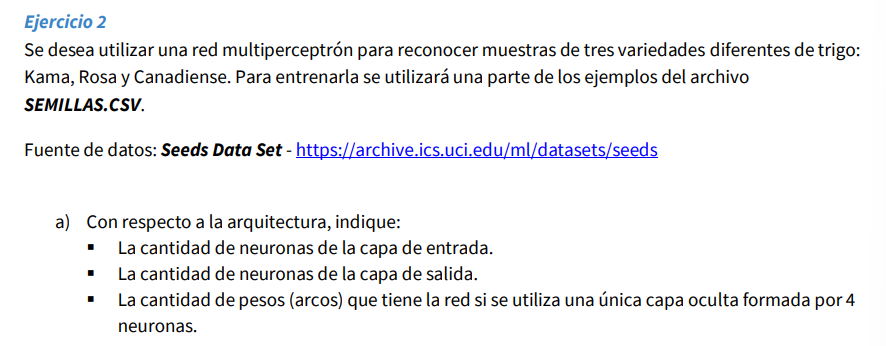

### Importe de librerias y lectura de datos

In [4]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [5]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'SEMILLAS.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

df

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


### Inciso a

In [6]:
df.head()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


In [11]:
df['Clase'].unique()

array(['Tipo1', 'Tipo2', 'Tipo3'], dtype=object)

- Cantidad de neuronas de la capa de entrada: 7 (7 features)
- Cantidad de neuronas de la capa de salida: 3 (3 posibles salidas)
- Cantidad de pesos que tiene la red si se utiliza una unica capa oculta formada por 4 neuronas: (7 neuronas de entrada * 4 neuronas ocultas) + (4 neuronas ocultas * 3 neuronasd de salida) = 28 + 12 = 40 pesos en total (sin contar el bias)

### Inciso b

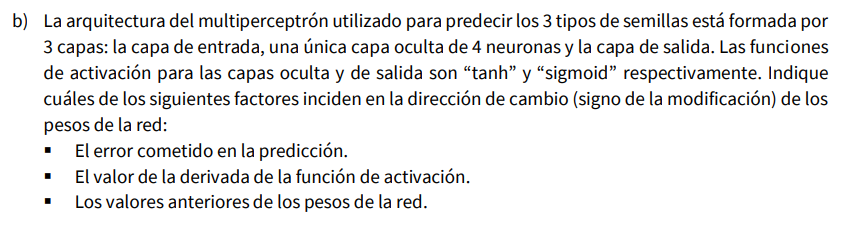

1. **Error cometido en la prediccion:** durante el entrenamiento se calcula el error como la diferencia entre la salida esperada y la real, este error determina cuanto y en que direccion deben modificarse los pesos de la red para mejorar la precision de la proxima iteracion. Esto se ve en el Backpropagation, donde se ajustan los pesos para minimizar el error total
2. **Valor de la derivada de la funcion de activacion:** Las derivadas de las funciones se utilizan para calcular el gradiente, que indica como cambiar los pesos para reducir el error. "a derivada de la función de activación actúa como un factor de escala para corregir los pesos" . Para la capa oculta y de salida se aplican las derivadas de sus respectivas funciones de activación, que son tanh y sigmoid, respectivamente.
3. **Valores anteriores de los pesos:** son importantes porque cada ajuste de los pesos parte de esos valores. Cada nuevo peso es una corrección del peso anterior, basada en el error de predicción y la derivada de la función de activación. (El valor anterior del peso no cambia la dirección del ajuste, pero sí es el punto de partida desde donde se aplica el cambio.
)

### Inciso c

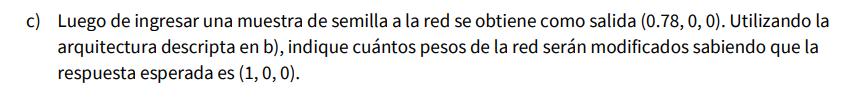

- Arquitectura: 7 neuronas de entrada, 4 ocultas, 3 neuronas de salida
- funciones de activacion: tanh (capa oculta) , sigmoid (capa salida)

- salida (0.78, 0, 0) --> 3 neuronas
- esperada (1, 0, 0)

En la neurona 1 de salida hay un error, por lo que los pesos que esten conectados a esta neurona van a modificarse (4 pesos entre salida y oculta). Debido al backpropagation, los pesos que conectan las 7 neuronas de la capa de entrada con las 4 neuronas de la capa oculta tambien se ajustan.
- 1 neurona de salida  *  4 neuronas ocultas = 4
- 7 neuronas de entrada * 4 neuronas ocultas = 28



TOTAL PESOS MODIFICADOS = 28 + 4 = 32